In [1]:
## 6. Linear Regression Sales Prediction

In [2]:
### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis


In [3]:
### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model


In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
path = r'C:\Users\Mary\Desktop\Data Analyst CF\Part 6\02 Data\Prepared Data'

In [7]:
df = pd.read_csv(os.path.join(path, 'dfcorrelations.csv'), index_col = 0)

In [8]:
pd.options.display.max_columns = None


In [9]:
df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_customer,lat_customer,lng_customer,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,customer_unique_id,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name,review_category,freight_flag,pur_del,start_date,end_date,n_of_days,distance
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,-23.537922,-46.477696,sao paulo,SP,1,debit_card,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,d71da8fd8c6e3adef26be965f065b8a1,5,b1a1199364a4a7fe27c4486ab63f550d,13848,-22.331249,-46.922580,mogi guaçu,SP,perfumery,Good review,Low freight,3 days 00:25:24,2018-04-24,2018-04-27,3,2399.699757
1,a035b83b3628decee6e3823924e0c10f,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-07-06 19:31:03,268.38,21.07,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,10,289.45,9ff6d1a05ecfe2d907adac11a2e2bfe9,delivered,2018-07-04 18:39:28,2018-07-05 16:33:14,2018-07-05 13:21:00,2018-07-10 22:34:39,2018-07-27 00:00:00,0f0f85749cb82321d902e390a9c33694,4,fc68ba9c34778e17224154c255b5656e,84200,-24.256442,-49.709951,jaguariaíva,PR,perfumery,Good review,Medium freight,6 days 03:55:11,2018-07-04,2018-07-10,6,2662.455144
2,091107484dd7172f5dcfed173e4a960e,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-27 19:31:35,7.65,10.55,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,2,57.75,360782688ff472f1adbd47a85861751e,delivered,2018-04-23 19:03:35,2018-04-24 19:17:45,2018-04-24 16:22:36,2018-04-25 23:02:39,2018-05-15 00:00:00,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,perfumery,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2340.750167
3,e8b61f78db501ea0ca45677d1ca27de2,49.0,120.0,1.0,400.0,50.0,10.0,25.0,a7708ffa8966514c098d15e1abfa6417,2,3d871de0142ce09b7081e2b9d1733cb1,2018-04-27 19:31:35,29.00,10.55,13232,-23.207064,-46.760735,campo limpo paulista,SP,1,credit_card,2,57.75,360782688ff472f1adbd47a85861751e,delivered,2018-04-23 19:03:35,2018-04-24 19:17:45,2018-04-24 16:22:36,2018-04-25 23:02:39,2018-05-15 00:00:00,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,toys,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2377.637320
4,ccac9976bafbf7e587bd2c29302e2314,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,206d1a13596872a713dba14504fdf699,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-08-01 16:35:17,268.38,18.07,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,8,286.45,58c5eb8e7844d1ecd85128e663f49e04,delivered,2018-07-29 20:50:22,2018-07-30 18:31:13,2018-08-01 15:24:00,2018-08-06 18:36:46,2018-08-15 00:00:00,36b616f738d1f617cc12aeb2c01705f3,3,1b6d2664b20a04a1fa9c900aedf29440,71920,-15.829934,-48.032895,brasilia,DF,perfumery,Medium review,Medium freight,7 days 21:46:24,2018-07-29,2018-08-06,8,2701.745065


In [10]:
df['order_status'].value_counts(dropna = False)


delivered    112650
canceled          7
Name: order_status, dtype: int64

In [11]:
# Add column year of order_id

In [12]:
df["start_date"] = pd.to_datetime(df["start_date"])


In [13]:
df['year'] = df['start_date'].dt.year

In [14]:
df['month'] = df['start_date'].dt.month

In [15]:
df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_customer,lat_customer,lng_customer,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,customer_unique_id,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name,review_category,freight_flag,pur_del,start_date,end_date,n_of_days,distance,year,month
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,-23.537922,-46.477696,sao paulo,SP,1,debit_card,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,d71da8fd8c6e3adef26be965f065b8a1,5,b1a1199364a4a7fe27c4486ab63f550d,13848,-22.331249,-46.922580,mogi guaçu,SP,perfumery,Good review,Low freight,3 days 00:25:24,2018-04-24,2018-04-27,3,2399.699757,2018,4
1,a035b83b3628decee6e3823924e0c10f,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-07-06 19:31:03,268.38,21.07,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,10,289.45,9ff6d1a05ecfe2d907adac11a2e2bfe9,delivered,2018-07-04 18:39:28,2018-07-05 16:33:14,2018-07-05 13:21:00,2018-07-10 22:34:39,2018-07-27 00:00:00,0f0f85749cb82321d902e390a9c33694,4,fc68ba9c34778e17224154c255b5656e,84200,-24.256442,-49.709951,jaguariaíva,PR,perfumery,Good review,Medium freight,6 days 03:55:11,2018-07-04,2018-07-10,6,2662.455144,2018,7
2,091107484dd7172f5dcfed173e4a960e,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-27 19:31:35,7.65,10.55,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,2,57.75,360782688ff472f1adbd47a85861751e,delivered,2018-04-23 19:03:35,2018-04-24 19:17:45,2018-04-24 16:22:36,2018-04-25 23:02:39,2018-05-15 00:00:00,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,perfumery,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2340.750167,2018,4
3,e8b61f78db501ea0ca45677d1ca27de2,49.0,120.0,1.0,400.0,50.0,10.0,25.0,a7708ffa8966514c098d15e1abfa6417,2,3d871de0142ce09b7081e2b9d1733cb1,2018-04-27 19:31:35,29.00,10.55,13232,-23.207064,-46.760735,campo limpo paulista,SP,1,credit_card,2,57.75,360782688ff472f1adbd47a85861751e,delivered,2018-04-23 19:03:35,2018-04-24 19:17:45,2018-04-24 16:22:36,2018-04-25 23:02:39,2018-05-15 00:00:00,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,toys,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2377.637320,2018,4
4,ccac9976bafbf7e587bd2c29302e2314,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,206d1a13596872a713dba14504fdf699,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-08-01 16:35:17,268.38,18.07,3694,-23.537922,-46.477696,sao paulo,SP,1,credit_card,8,286.45,58c5eb8e7844d1ecd85128e663f49e04,delivered,2018-07-29 20:50:22,2018-07-30 18:31:13,2018-08-01 15:24:00,2018-08-06 18:36:46,2018-08-15 00:00:00,36b616f738d1f617cc12aeb2c01705f3,3,1b6d2664b20a04a1fa9c900aedf29440,71920,-15.829934,-48.032895,brasilia,DF,perfumery,Medium review,Medium freight,7 days 21:46:24,2018-07-29,2018-08-06,8,2701.745065,2018,7


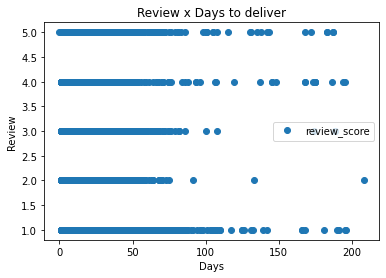

In [16]:
df.plot(x = 'n_of_days', y='review_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Review x Days to deliver')  
plt.xlabel('Days')  
plt.ylabel('Review')  
plt.show()

In [17]:
# Create a subset with customer_id, sum per year in columns year 2016, 2017, 2018

subdf =  df.groupby('year',as_index=False).agg({'customer_id': 'count', 'order_id': 'count', 'payment_value': 'sum', 'review_score': 'mean' })


In [18]:
subdf

,year,customer_id,order_id,payment_value,review_score
0,2016,335,335,61612.81,3.886567
1,2017,50913,50913,8620837.52,4.107831
2,2018,61409,61409,10652410.10,4.061896


In [19]:
### Data prep for regression analysis 

In [20]:
# The regression analysis can be done in several ways
# - review_score and n_of_days to deliver, which had a correlation of -0,3. 
# Since some columns are categorical data, i'll have to create dummy indicators/ variables.

In [21]:
# review_score and n_of_days to deliver

X = df['n_of_days']

In [22]:
y = df['review_score']

In [23]:
X = pd.get_dummies(data=X, drop_first=True)

In [24]:
len(X) == len(y)

True

In [25]:
print(len(X))

112657


In [26]:
print(len(y))

112657


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 0)

In [28]:
regression = linear_model.LinearRegression()

In [29]:
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
y_predicted = regression.predict(X_test)

In [32]:
y_predicted

array([2.42290749, 3.91068447, 4.09670518, ..., 4.29922154, 4.15106635,
       4.28566565])

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-5.69811321e-01 -5.58638083e-01 -6.09507042e-01 -6.35635359e-01
 -6.87177078e-01 -6.99870394e-01 -7.00778463e-01 -7.14334355e-01
 -7.66397479e-01 -8.04316248e-01 -7.97557114e-01 -8.26332596e-01
 -7.98048252e-01 -8.48933649e-01 -8.93030190e-01 -9.03294822e-01
 -9.75561097e-01 -1.03379828e+00 -9.62752525e-01 -1.08432935e+00
 -1.08931553e+00 -1.24556738e+00 -1.35874439e+00 -1.31382316e+00
 -1.50289017e+00 -1.52380952e+00 -1.53320313e+00 -1.93790150e+00
 -2.00714286e+00 -2.00298507e+00 -2.25159236e+00 -2.29020979e+00
 -2.33636364e+00 -2.53149606e+00 -2.57709251e+00 -2.62303665e+00
 -2.90384615e+00 -3.15441176e+00 -3.01408451e+00 -2.85294118e+00
 -3.04545455e+00 -3.02752294e+00 -3.14953271e+00 -3.00000000e+00
 -3.21739130e+00 -3.42696629e+00 -3.64516129e+00 -3.16000000e+00
 -3.52272727e+00 -3.25000000e+00 -3.60526316e+00 -2.78260870e+00
 -3.41666667e+00 -3.06896552e+00 -3.73333333e+00 -3.32258065e+00
 -3.27777778e+00 -3.00000000e+00 -3.64705882e+00 -3.41176471e+00
 -3.07692308e+00 -

In [35]:
y_predicted

array([2.42290749, 3.91068447, 4.09670518, ..., 4.29922154, 4.15106635,
       4.28566565])

In [36]:
y_test.shape

(33798,)

In [37]:
X_test.shape

(33798, 138)

In [38]:
##### Compare how the regression fits the training set

In [39]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-5.69811321e-01 -5.58638083e-01 -6.09507042e-01 -6.35635359e-01
 -6.87177078e-01 -6.99870394e-01 -7.00778463e-01 -7.14334355e-01
 -7.66397479e-01 -8.04316248e-01 -7.97557114e-01 -8.26332596e-01
 -7.98048252e-01 -8.48933649e-01 -8.93030190e-01 -9.03294822e-01
 -9.75561097e-01 -1.03379828e+00 -9.62752525e-01 -1.08432935e+00
 -1.08931553e+00 -1.24556738e+00 -1.35874439e+00 -1.31382316e+00
 -1.50289017e+00 -1.52380952e+00 -1.53320313e+00 -1.93790150e+00
 -2.00714286e+00 -2.00298507e+00 -2.25159236e+00 -2.29020979e+00
 -2.33636364e+00 -2.53149606e+00 -2.57709251e+00 -2.62303665e+00
 -2.90384615e+00 -3.15441176e+00 -3.01408451e+00 -2.85294118e+00
 -3.04545455e+00 -3.02752294e+00 -3.14953271e+00 -3.00000000e+00
 -3.21739130e+00 -3.42696629e+00 -3.64516129e+00 -3.16000000e+00
 -3.52272727e+00 -3.25000000e+00 -3.60526316e+00 -2.78260870e+00
 -3.41666667e+00 -3.06896552e+00 -3.73333333e+00 -3.32258065e+00
 -3.27777778e+00 -3.00000000e+00 -3.64705882e+00 -3.41176471e+00
 -3.07692308e+00 -

In [42]:
# Since the mean squared error is too high, this means that the linear regression may not be the best model to predict the review_score and there are more variables that could influence the results.

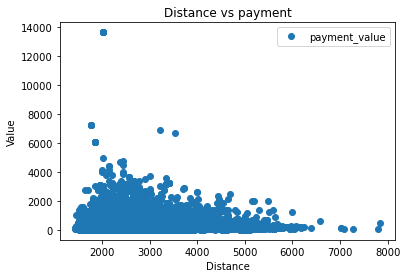

In [43]:
# See how the scatterplot looks without outliers.

df.plot(x = 'distance', y='payment_value', style='o')  
plt.title('Distance vs payment')  
plt.xlabel('Distance')  
plt.ylabel('Value')  
plt.show()

In [44]:
X = df['distance'].values.reshape(-1,1)
y = df['payment_value'].values.reshape(-1,1)

In [45]:
X

array([[2399.699757],
       [2662.455144],
       [2340.750167],
       ...,
       [3195.001326],
       [3490.802023],
       [3490.802023]])

In [46]:
y

array([[ 18.3 ],
       [289.45],
       [ 57.75],
       ...,
       [ 48.94],
       [273.22],
       [273.22]])

In [47]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
### 4. Regression analysis

In [49]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [50]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

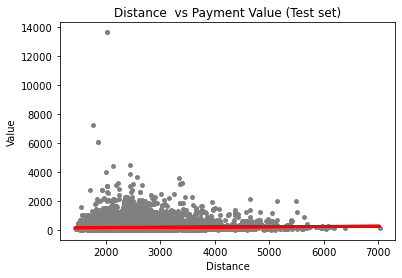

In [52]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance  vs Payment Value (Test set)')
plot_test.xlabel('Distance')
plot_test.ylabel('Value')
plot_test.show()

In [53]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [54]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01913007]]
Mean squared error:  65973.79688871873
R2 score:  0.0012840305599299828


In [55]:
y_predicted

array([[164.10558926],
       [164.83254422],
       [178.89469556],
       ...,
       [175.77826881],
       [170.82035014],
       [164.62333057]])

In [56]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,64.82,164.105589
1,246.79,164.832544
2,204.34,178.894696
3,65.09,166.361511
4,93.56,160.442825
5,25.78,179.693444
6,96.65,162.654638
7,191.14,172.697214
8,277.08,209.418677
9,342.12,171.771760


In [57]:
##### Compare how the regression fits the training set

In [58]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [59]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [60]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01913007]]
Mean squared error:  71616.68083671838
R2 score:  0.001149848613405502


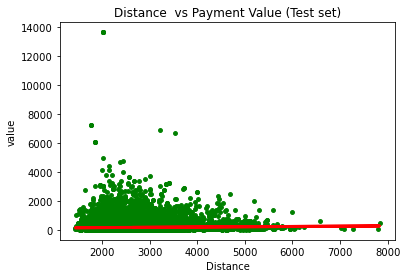

In [61]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance  vs Payment Value (Test set)')
plot_test.xlabel('Distance')
plot_test.ylabel('value')
plot_test.show()